In [1]:
#Daniel Holland
#imports libarys
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as plt
import matplotlib.pyplot as plt 
import pandas_datareader as web

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [2]:
#gives the user information on the SPY index
print("Entering the company SPY, will give you a prediction on the S&P 500  ")


Entering the company SPY, will give you a prediction on the S&P 500  


In [3]:
#asks the user for a company ticker symbol
company = input("enter company ticker symbol: ")
#sets start date
start = dt.datetime(2014,1,1)
#sets star date
end = dt.datetime(2020,1,1,)

#creates a loop to ensure data is collected
for x in range(1):
        try:
            df = web.DataReader(company, 'yahoo', start, end)
            df.shape
            print("data collected")
            break
        #checks for input error
        except KeyError:
            print("no data from this company was found in 2014")
            False
    


    
    

enter company: SPY
data collected


In [4]:
#shows information to the user
print("The technical indicator being used, is 'close'.\nThe closing price is the last price at which the stock traded during the regular trading day")

The technical indicator being used, is 'close'.
The closing price is the last price at which the stock traded during the regular trading day


In [8]:
#shows information to the user
print("The algorithm being used is a recurrent neural network, that uses long short-term memory(LSTM)\nThe algorithm uses the last 60 days of data to predict the next day.\nThis predicted day is then used to make the next predicted day and so on.  ")

The algorithm being used is a recurrent neural network, that uses long short-term memory(LSTM)
The algorithm uses the last 60 days of data to predict the next day.
This predicted day is then used to make the next predicted day and so on.  


In [9]:
#sets the range to scale the data
scaler = MinMaxScaler(feature_range = (0,1))

#scales the close data
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

scaled_data.shape


(1510, 1)

In [11]:
#sets last_days to 60
last_days = 60

In [12]:
#creates 2 lists
x_train = []
y_train = []

In [13]:
#creates a loop to retrive the 60 days
for x in range(last_days, len(scaled_data)):
    #adds them to the list
    x_train.append(scaled_data[x-last_days:x, 0])
    y_train.append(scaled_data[x, 0])



In [14]:
#sets the list to arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [15]:
#reshapes x_train
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))

In [16]:
#sets model to sequential
model = Sequential()
#creates first layer and variables set
model.add(LSTM(units = 55,return_sequences = True, input_shape = (x_train.shape[1], 1)))
#dropsout set to 0.2
model.add(Dropout(0.2))
#creates first layer and variables set
model.add(LSTM(units = 55,return_sequences = True))
#dropsout set to 0.3
model.add(Dropout(0.30))

#creates first layer and variables set
model.add(LSTM(units = 55))
#dropsout set to 0.3
model.add(Dropout(0.50))
#
model.add(Dense(units = 1))


In [17]:
#model compiled
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [18]:
#model was then trained with different paramaters
model.fit(x_train, y_train, epochs = 5, batch_size = 10)

Epoch 1/5
145/145 [==============================] - 9s 34ms/step - loss: 0.0420
Epoch 2/5
145/145 [==============================] - 5s 33ms/step - loss: 0.0100
Epoch 3/5
145/145 [==============================] - 5s 37ms/step - loss: 0.0062
Epoch 4/5
145/145 [==============================] - 6s 40ms/step - loss: 0.0062
Epoch 5/5
145/145 [==============================] - 5s 32ms/step - loss: 0.0052


In [19]:
# test data
#sets dates
start_test = dt.datetime(2020,1,1)
end_test = dt.datetime.now()
#gets data
test_data = web.DataReader(company, 'yahoo', start_test, end_test)

test_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,324.890015,322.529999,323.540009,324.869995,59151200.0,317.873199
2020-01-03,323.640015,321.100006,321.160004,322.410004,77709700.0,315.466217
2020-01-06,323.730011,320.359985,320.489990,323.640015,55653900.0,316.669739
2020-01-07,323.540009,322.239990,323.019989,322.730011,40496400.0,315.779327
2020-01-08,325.779999,322.670013,322.940002,324.450012,68296000.0,317.462311
...,...,...,...,...,...,...
2021-04-26,418.220001,416.809998,417.440002,417.609985,52182400.0,417.609985
2021-04-27,418.140015,416.299988,417.929993,417.519989,51303100.0,417.519989
2021-04-28,419.010010,416.899994,417.809998,417.399994,51238900.0,417.399994


In [20]:
#gets only the close data
actual_prices = test_data['Close'].values

In [21]:
#concats the data
total_dataset = pd.concat((df['Close'], test_data['Close']), axis = 0)

In [22]:
#further pre-processes test data
model_inputs = total_dataset[len(total_dataset) - len(test_data) - last_days:].values

In [23]:
#reshapes and scales the data
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [24]:
#creates empty list
x_test = []

In [25]:
#sets the loop
for x in range(last_days, len(model_inputs)):
    x_test.append(model_inputs[x-last_days:x, 0])

In [26]:

x_test

[array([0.79928739, 0.76870335, 0.78712098, 0.8003629 , 0.82079718,
        0.81857909, 0.83827387, 0.83504734, 0.84096254, 0.83215702,
        0.84573495, 0.83914773, 0.84499565, 0.84828926, 0.85655713,
        0.86798404, 0.86737911, 0.87363052, 0.86818569, 0.88707409,
        0.89534176, 0.89305637, 0.89352695, 0.90078639, 0.90589501,
        0.90192918, 0.9062983 , 0.90697052, 0.9099952 , 0.92505214,
        0.92659802, 0.92599308, 0.91819578, 0.91483489, 0.91947294,
        0.93567247, 0.94044488, 0.94985554, 0.94199096, 0.92404391,
        0.9099952 , 0.92283383, 0.92659802, 0.94575514, 0.93910064,
        0.93674798, 0.94273046, 0.96094644, 0.9622236 , 0.97687704,
        0.97734762, 0.97748198, 0.9862875 , 0.98514491, 0.98843852,
        0.9885058 , 1.        , 0.99946214, 0.98749737, 0.99274036]),
 array([0.76870335, 0.78712098, 0.8003629 , 0.82079718, 0.81857909,
        0.83827387, 0.83504734, 0.84096254, 0.83215702, 0.84573495,
        0.83914773, 0.84499565, 0.84828926, 0.

In [27]:
#sets as array
x_test = np.array(x_test)

In [28]:
reshapes
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))
x_test.shape

(335, 60, 1)

In [29]:
#makes the prediction
predicted = model.predict(x_test)
predicted = scaler.inverse_transform(predicted)



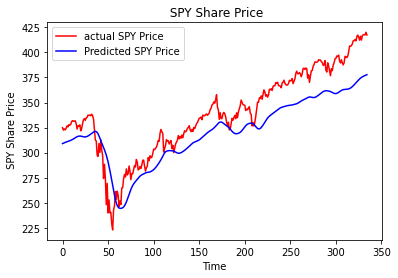

In [30]:
#visulizes the data
plt.plot(actual_prices, color='red', label=f"actual {company} Price")
plt.plot(predicted, color='blue',label=f"Predicted {company} Price")
plt.title(f" {company} Share Price")
plt.xlabel('Time')
plt.ylabel(f' {company} Share Price')
plt.legend()
plt.show()

In [31]:

#sets the dataset for the next day prediction
future = [model_inputs[len(model_inputs) + 1 - last_days:len(model_inputs+1), 0]]
future = np.array(future)
future = np.reshape(future,(future.shape[0], future.shape[1],1))


In [32]:
#produces the prediction
prediction = model.predict(future)
prediction = scaler.inverse_transform(prediction)
#prints prediction
print(f"The Prediction for tomorrow for {company} :{prediction}")

The Prediction for tomorrow for SPY :[[378.07162]]
